<a href="https://colab.research.google.com/github/mahtabbk7/mahtab.bk.io/blob/main/new_logistic_reggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Import

In [62]:
import numpy as np
import pandas as pd

# Preprocessing


In [56]:
dataset = pd.read_csv('data.csv')
dataset = dataset.drop(['Sl. No', 'Patient File No.'], axis=1)

In [57]:
from sklearn.impute import SimpleImputer
def preprocess_features(X):
    X_processed = X.copy()


    categorical_columns = ['Blood Group', 'Cycle(R/I)']
    for col in categorical_columns:
        if col in X_processed.columns:

            imputer = SimpleImputer(strategy='most_frequent')
            X_processed[col] = imputer.fit_transform(X_processed[[col]]).ravel()


            le = LabelEncoder()
            X_processed[col] = le.fit_transform(X_processed[col])


    binary_columns = ['Weight gain(Y/N)', 'Pregnant(Y/N)', 'hair growth(Y/N)',
                     'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
                     'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

    for col in binary_columns:
        if col in X_processed.columns:

            imputer = SimpleImputer(strategy='most_frequent')
            X_processed[col] = imputer.fit_transform(X_processed[[col]]).ravel()

    numerical_columns = [col for col in X_processed.columns
                        if col not in categorical_columns + binary_columns]

    for col in numerical_columns:
        imputer = SimpleImputer(strategy='mean')
        X_processed[col] = imputer.fit_transform(X_processed[[col]]).ravel()
    return X_processed

In [58]:
X = dataset.drop('PCOS (Y/N)', axis=1)
y = dataset['PCOS (Y/N)']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
X_train_processed = preprocess_features(X_train)
X_test_processed = preprocess_features(X_test)

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Train


In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

# Evaluate

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [65]:
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

Confusion Matrix:
 [[63  7]
 [10 29]]
Accuracy Score: 0.8440366972477065


# New Section

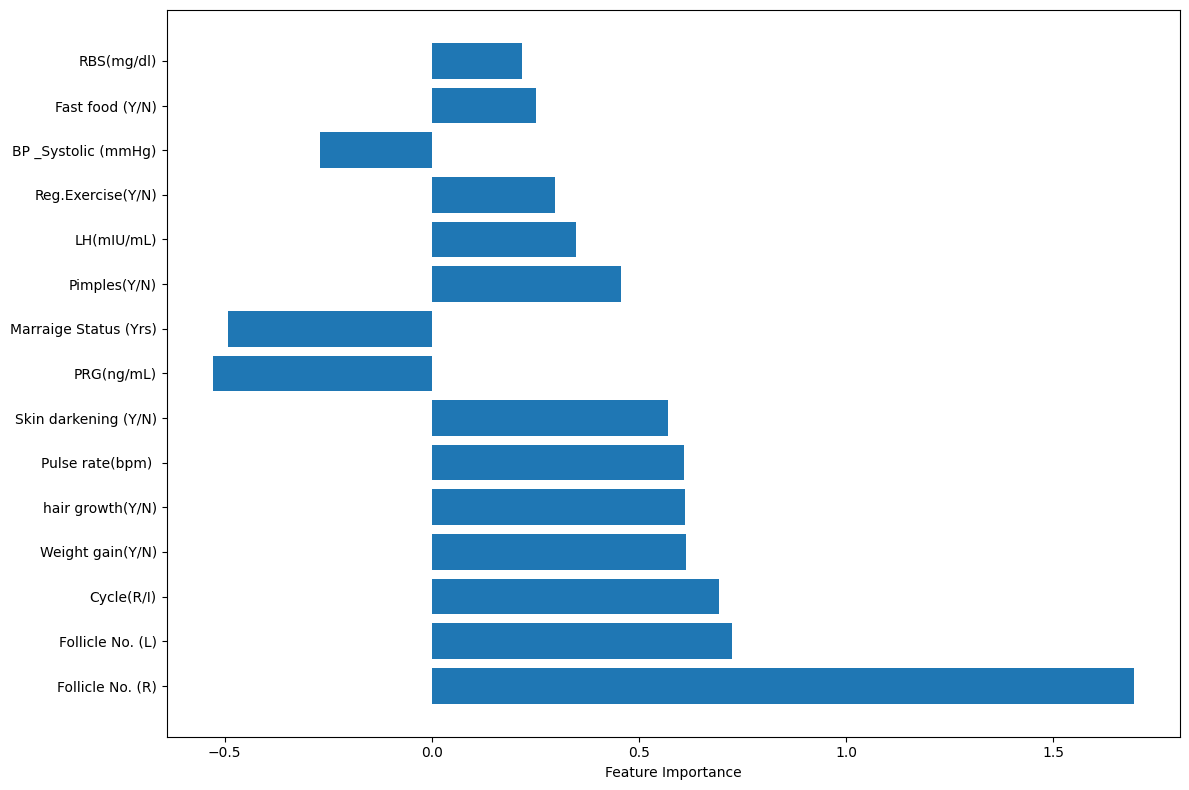

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = X_train_processed.columns.tolist()
feature_importance = classifier.coef_[0]

plt.figure(figsize=(12, 8))
indices = np.argsort(np.abs(feature_importance))[::-1][:15]
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()
